In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np 
import pandas as pd
import math
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [14]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 


#Calculo de lambda2 para red compleja en anillo
def lambda2_para_RCaAnillo(N, K):
    suma = 0
    for j in range(1,(K//2)+1):
        suma = suma + math.sin((j*math.pi)/N)**2
    lambda2 = -4*suma
    return lambda2



#Esta funcion crea una Red Topologia regular con acopalmiento circular conectando cada nodo a sus k/2 vecinos mas cercanos
def create_network(n, k):
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    return G



In [23]:
#Parametros de configuracion de la red.
n, k, p= 50, 4, 0.8

[[-4.  1.  1. ...  0.  1.  1.]
 [ 1. -4.  1. ...  0.  0.  1.]
 [ 1.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  1.]
 [ 1.  0.  0. ...  1. -4.  1.]
 [ 1.  1.  0. ...  1.  1. -4.]]
-0.07860427511378212
Los valores propios son:
[1.6517192325975946e-16, -0.07860427511377958, -0.07860427511378223, -0.31022031765501057, -0.3102203176550107, -0.682509773380675, -0.6825097733806763, -1.1757330499542766, -1.1757330499542835, -1.7639320225002135, -1.763932022500216, -2.4164817060985437, -2.4164817060985477, -3.099914649674061, -3.09991464967407, -3.7799049931721456, -3.7799049931721695, -4.000000000000003, -4.047063080371687, -4.047063080371708, -4.184552962169536, -4.184552962169548, -4.401615716933678, -4.40161571693368, -4.42328939636723, -4.423289396367238, -4.680959770129733, -4.680959770129754, -4.9999999999999885, -4.999999999999995, -4.999999999999998, -5.000000000000001, -5.332356215784201, -5.3323562157842215, -5.484790342605051, -5.484790342605055, -5.649610608668813, -5.

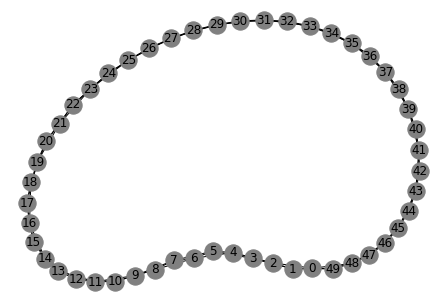

In [24]:
#Red Topologia regular con acopalmiento circular
G_circular = create_network(n,k//2)
nx.draw(G_circular,**opts)
MA = matriz_acoplaminento(G_circular)
print(MA)
lambda2 = lambda2_para_RCaAnillo(n,k)
print(lambda2)


#Calculo de los valores propios de la matriz de acoplamiento
vpropio = np.linalg.eigvals(MA)
vpropio = sorted(vpropio,reverse=True)
print("Los valores propios son:")
print(vpropio)
print("El valos propio Lamda2 es:")
print(vpropio[1])

La matriz de acoplamiento es:
[[ -7.   0.   1. ...   0.   0.   0.]
 [  0.  -7.   1. ...   0.   1.   0.]
 [  1.   1. -11. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  -9.   0.   0.]
 [  0.   1.   0. ...   0.  -6.   0.]
 [  0.   0.   0. ...   0.   0. -10.]]
El coeficiente de agrupamiento promedio es: 0.13893861693861692
El promedio del camino mas corto es: 2.033469387755102
Los valores propios son:
[2.6374139577590107e-15, -2.7655648395886803, -3.2954753483521393, -3.5197514403217154, -3.776038014273589, -3.982161758711499, -4.266538170149416, -4.38145775813031, -4.531504609339009, -4.7961337480199795, -4.977921982296181, -5.015899954491753, -5.1572749088542515, -5.3109877781422155, -5.536440096362272, -5.615504736650863, -6.033261772428334, -6.2243346275184415, -6.379553542423703, -6.683742865054774, -6.852616714237924, -6.91928528820439, -7.184229908252181, -7.3305103392586926, -7.553449249655818, -7.716979709247124, -8.216079673131937, -8.460029827735822, -8.577053920570425, -8.7679

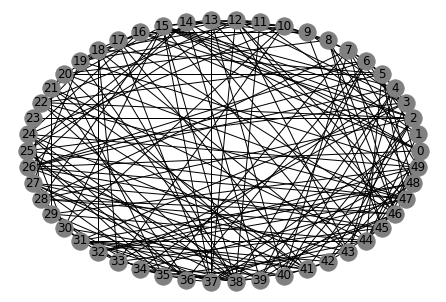

In [25]:
#Modifica la red a partir del algoritmo de Watts - Strogatz
G = nx.watts_strogatz_graph(n, 2*k, p)
nx.draw_circular(G,**opts)
ma = matriz_acoplaminento(G)
print("La matriz de acoplamiento es:")
print(ma)
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print("El coeficiente de agrupamiento promedio es:",nx.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valos propio Lamda2 es:")
print(vp[1])